<a href="https://colab.research.google.com/github/DhrubojyotiDey/Deep-learning-with-Tensorflow-keras-and-some-Sarcastic-Stuff/blob/master/kaggle_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import zipfile
import numpy as np
import random
import os
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [2]:
!wget -O style_clothes.zip "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/33954/3121082/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1704292149&Signature=hMYTFGjtFJ0pLJi9PRpBlZ1oq06OcqUuNqeU5O87WB2flqRogxhCENrtXn2ittK5lEJSEMCeeVEMcUkvKeeErOpetFDNK9idgJKwZyHumHfhJUEsI7oPvFT%2FSAml7j0iC7vQnR6CSYUA9XlsPWpXWAUCmP10Ij%2FOAjiAffb83SXYSUWGrBSWP7J4nnK2kQqt8zwhEtkmzdL9XdmTfYer6GJouyUXRBXGzdae2KVKuOoW2ltp4dud9Lclj4jEZ0ESSBIvUmVUgYktMC7P17OOEsMwHLNqP3yz%2Fl%2BHg3Jqfw4mgOJNtSolG8kT%2F35oq6bysdB0qNixr8MlEsUlkBMFGw%3D%3D&response-content-disposition=attachment%3B+filename%3Dimage-classification-screening.zip"

print(os.getcwd())
local_zip = '/content/style_clothes.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/clothes')
zip_ref.close()


--2024-01-02 11:28:17--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/33954/3121082/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1704292149&Signature=hMYTFGjtFJ0pLJi9PRpBlZ1oq06OcqUuNqeU5O87WB2flqRogxhCENrtXn2ittK5lEJSEMCeeVEMcUkvKeeErOpetFDNK9idgJKwZyHumHfhJUEsI7oPvFT%2FSAml7j0iC7vQnR6CSYUA9XlsPWpXWAUCmP10Ij%2FOAjiAffb83SXYSUWGrBSWP7J4nnK2kQqt8zwhEtkmzdL9XdmTfYer6GJouyUXRBXGzdae2KVKuOoW2ltp4dud9Lclj4jEZ0ESSBIvUmVUgYktMC7P17OOEsMwHLNqP3yz%2Fl%2BHg3Jqfw4mgOJNtSolG8kT%2F35oq6bysdB0qNixr8MlEsUlkBMFGw%3D%3D&response-content-disposition=attachment%3B+filename%3Dimage-classification-screening.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.207, 74.125.124.207, 172.217.212.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8604845073 (8.0G) [application/zip]
Saving to: ‘style_clothes.zip’

st

In [3]:
import os
import pandas as pd
from shutil import copyfile

# Define paths
base_path = '/tmp/clothes'
labels_file = f'{base_path}/train_label.csv'
train_folder = f'{base_path}/train'
output_folder = f'{base_path}/class_folders'

# Read labels from the CSV file
labels_df = pd.read_csv(labels_file)

# Create output folders for each class
classes = labels_df['label'].unique()

for class_name in classes:
    class_folder = os.path.join(output_folder, str(class_name))
    os.makedirs(class_folder, exist_ok=True)

# Move images to class folders based on labels
for index, row in labels_df.iterrows():
    file_name = row['file_name']
    label = row['label']

    source_path = os.path.join(train_folder, file_name)
    destination_folder = os.path.join(output_folder, str(label))
    destination_path = os.path.join(destination_folder, file_name)

    # Ensure the source file exists before moving
    if os.path.exists(source_path):
        # Move the file to the destination
        copyfile(source_path, destination_path)
        print(f"Moved {file_name} to {label} folder.")
    else:
        print(f"Source file {file_name} not found. Skipped.")


Streaming output truncated to the last 5000 lines.
Moved Image_026829.jpg to 7 folder.
Moved Image_026830.jpg to 7 folder.
Moved Image_026831.jpg to 7 folder.
Moved Image_026832.jpg to 7 folder.
Moved Image_026833.jpg to 7 folder.
Moved Image_026834.jpg to 7 folder.
Moved Image_026835.jpg to 7 folder.
Moved Image_026836.jpg to 7 folder.
Moved Image_026837.jpg to 7 folder.
Moved Image_026838.jpg to 7 folder.
Moved Image_026839.jpg to 7 folder.
Moved Image_026840.jpg to 7 folder.
Moved Image_026841.jpg to 7 folder.
Moved Image_026842.jpg to 7 folder.
Moved Image_026843.jpg to 7 folder.
Moved Image_026844.jpg to 7 folder.
Moved Image_026845.jpg to 7 folder.
Moved Image_026846.jpg to 7 folder.
Moved Image_026847.jpg to 7 folder.
Moved Image_026848.jpg to 7 folder.
Moved Image_026849.jpg to 7 folder.
Moved Image_026850.jpg to 7 folder.
Moved Image_026851.jpg to 7 folder.
Moved Image_026852.jpg to 7 folder.
Moved Image_026853.jpg to 7 folder.
Moved Image_026854.jpg to 7 folder.
Moved Image_0

In [4]:
training_path='/tmp/clothes/train'
test_path='/tmp/clothes/test'
label_path='/tmp/clothes/train_label.csv'
print(len(os.listdir(training_path)))
print(len(os.listdir(test_path)))


31749
18223


In [5]:
!ls '/tmp/clothes/train_label.csv'

/tmp/clothes/train_label.csv


In [6]:
# Set the fixed dimension
target_size = (1500, 1500)
num_classes = 11  # Replace with the actual number of classes


In [7]:
os.getcwd()

'/content'

In [8]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "/tmp/clothes/class_folders",
    shuffle=True,
    image_size=(256, 265),
    batch_size=32,
)

Found 31749 files belonging to 11 classes.


In [9]:
# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
names=dataset.class_names

(32, 256, 265, 3)
[ 8 10  7  8  1  6  4  7  3  3  4  5  3  4  3  4  5  4  8  3  7  7  6  7
  8  3 10  7  7  7 10  6]


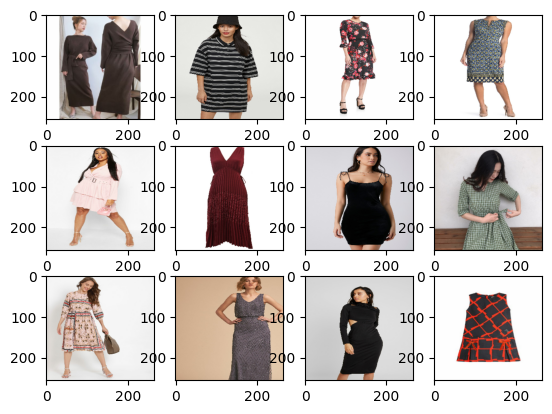

In [11]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))


In [12]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split+test_split+val_split)==1

    ds_size = len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size= int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [13]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [14]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
resized=tf.keras.Sequential([

    layers.experimental.preprocessing.Resizing(256, 256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [16]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),

])

In [17]:
input_shape = (32, 256, 256, 3)

n_classes= 11

model= models.Sequential([
    resized,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation= 'relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),


    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),


    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [18]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history= model.fit(train_ds,
          batch_size=128,
          validation_data=val_ds,
          verbose=1,
          epochs=30)

Epoch 1/30


In [ ]:
# Load training data with labels
train_generator = train_datagen.flow_from_directory(
    training_path,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',  # Assuming you have multiple classes
    shuffle=False  # To maintain the association between images and labels
)


Found 0 images belonging to 0 classes.


In [ ]:
# Load test data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)


Found 0 images belonging to 0 classes.


In [ ]:
# Load labels from the CSV file
labels_df = pd.read_csv(label_path)


In [ ]:
# Add labels to the training data generator
train_generator.class_indices = {class_name: i for i, class_name in enumerate(train_generator.class_indices)}
train_generator.classes = labels_df['label'].map(train_generator.class_indices).values


In [ ]:
# Build a simple convolutional neural network (CNN) model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(target_size[0], target_size[1], 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))


ResourceExhaustedError: ignored

In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

In [ ]:
import time

In [ ]:
for _ in range(200):
  print(_)
  time.sleep(10)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
